# Graphene Raman: 3-peak fitting of D, G and 2D

This is a fitting script for Raman spectra of graphene, to determine important characteristics like the ratio of the defect (D) peak to the graphite (G) peak or the symmetry of the the 2D peak.

## Graphene Raman peaks

The main graphene peaks are modeled as lmfit [Pseudo Voigt peaks](https://lmfit.github.io/lmfit-py/builtin_models.html#pseudovoigtmodel).

The script is aimed at a standard evaluation of these properties for multiple spectra, to obtain reasonable statistics.

In [146]:
#The default definition of peaks and ranges in the graphene spectrum
GRAPHENEPEAKS = [
    {
        #The name of the peak
        'prefix': 'D',
        #The range in the spectrum: baseline correction will irgnore this range
        'range': {'min': 1290.0, 'max': 1420.0, 'vary': True},
        #constraints for the peak position
        'center': {'min': 1340.0, 'init': 1350, 'max': 1360.0, 'vary': True},
        #constraints for the peak width
        'sigma': {'min': 5.0, 'init': 30.0, 'max': 40.0, 'vary': True},
        #constraints for the gaussian to lorentzian ratio
        'fraction': {'min': 0.01, 'init': 0.8, 'max': 1.0, 'vary': True},
        #constraints for the peak height
        'amplitude': {'min': 0.0, 'vary': True},
        #If set to False, the peak will not be fitted, only initialized
        'vary': True
    },
    {
        #The name of the peak
        'prefix': 'G',
        #The range in the spectrum: baseline correction will irgnore this range
        'range': {'min': 1480.0, 'max': 1700.0, 'vary': True},
        #constraints for the peak position
        'center': {'min': 1560.0, 'init': 1585.0, 'max': 1610.0, 'vary': True},
        #constraints for the peak width
        'sigma': {'min': 5.0, 'init': 25.0, 'max': 50.0, 'vary': True},
        #constraints for the gaussian to lorentzian ratio
        'fraction': {'min': 0.01, 'init': 0.4, 'max': 1.0, 'vary': True},
        #constraints for the peak height
        'amplitude': {'min': 0.0, 'vary': True},
        #If set to False, the peak will not be fitted, only initialized
        'vary': True
    },
    {
        #The name of the peak
        'prefix': 'Dplus',
        #The range in the spectrum: baseline correction will irgnore this range
        'range': {'min': 2350.0, 'max': 2540.0, 'vary': True},
        #constraints for the peak position
        'center': {'min': 2420.0, 'init': 2450.0, 'max': 2500.0, 'vary': True},
        #constraints for the peak width
        'sigma': {'min': 5.0, 'init': 25.0, 'max': 50.0, 'vary': True},
        #constraints for the gaussian to lorentzian ratio
        'fraction': {'min': 0.01, 'init': 0.4, 'max': 1.0, 'vary': True},
        #constraints for the peak height
        'amplitude': {'min': 0.0, 'vary': True},
        #If set to False, the peak will not be fitted, only initialized
        'vary': False
    },
    {
        #The name of the peak
        'prefix': 'twoD',
        #The range in the spectrum: baseline correction will irgnore this range
        'range': {'min': 2600.0, 'max': 2790.0, 'vary': True},
        #constraints for the peak position
        'center': {'min': 2650.0, 'init': 2670, 'max': 2750.0, 'vary': True},
        #constraints for the peak width
        'sigma': {'min': 5.0, 'init': 25.0, 'max': 80.0, 'vary': True},
        #constraints for the gaussian to lorentzian ratio
        'fraction': {'min': 0.01, 'init': 0.4, 'max': 1.0, 'vary': True},
        #constraints for the peak height
        'amplitude': {'min': 0.0, 'vary': True},
        #If set to False, the peak will not be fitted, only initialized
        'vary': True
    }
]


The required packages are mostly part of the anaconda distribution. [lmfit](https://lmfit.github.io/lmfit-py/) is installed separately. Tested with Python 3.5.2 and lmfit 0.9.5

In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##Multi-peak script
To edit

In [148]:
from multipeak import *

In [149]:
from lmfit._version import get_versions
print('Python version:', sys.version)
print('lmfit version:', get_versions()['version'])

Python version: 3.5.2 | packaged by conda-forge | (default, Jul 26 2016, 02:06:09) [MSC v.1900 64 bit (AMD64)]
lmfit version: 0.9.5


In [150]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Fitting task

Raman spectra of graphene are supplied in a text file, with the Ramanshift in cm<sup>-1</sup> and the intensity in separate columns. The resolution should be better than 1.5 cm<sup>-1</sup>, the range from at least from 1265 cm<sup>-1</sup> to 2810 cm<sup>-1</sup> for fitting of the default peaks.

The file can contain multiple datasets with an equal number of datapoints, each dataset is then individually processed and average values and histograms are generated.

Optionally, the data will be cut to the range specified by TASK['xmin'] and TASK['xmax'].

The default fitting uses separate fitting tasks with specific baseline subtraction for the D + G band and the 2D band. In general this leads to more robust results.

In [151]:
TASK = {
    #Filename as full path. The file can contain multiple datasets with an equal number of datapoints
    'filename': 'examples/CVD_graphene_example.txt',  #optional
    
    #If filename is left unspecified a file dialog will open in:
    'initialDir': './',
    
    #Columns in the file to be used
    'posx_column': 0,  #optional
    'posy_column': 1,  #optional
    'ramanshift_column': 2,
    'ramanintensity_column': 3,
    
    #Set to the order of polynomial for baseline subtraction, 0 for no baseline
    #Maxium allowed value is 7
    #Note that this is ignored if a partially defined baseline is used
    'baselineOrder': 6,
    
    #Minimum signal-to-noise ratio, if 0 all speactra are used
    'snr': 10,
    
    #The minimum number of remaining spectra after signal-to-noise selection 
    'minimumStatisctics': 10,
    
    #Minium x value
    'xmin': 1200.0,  #optional
    #Maximum x value
    'xmax': 2810.0,  #optional
    
    #Dictionary where the peaks are defined
    'peaks': deepcopy(GRAPHENEPEAKS)
}

"""Partially defined polynomial baseline"""
BASELINE = [
    {
        #partial baseline is defined
        'untilX': 1750.0,  #in wavenumbers
        #and has
        'polynomialOrder': 2,
        #and requires minimum signal-to-noise ratio
        'snr': 10  #which can be 0 to include all spectra
    },
    {
        'untilX': 2555.0,
        'polynomialOrder': 4,
        'snr': 0
    },
    {
        'untilX': 2810.0,
        'polynomialOrder': 1,
        'snr': 10
    }
]

In [152]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})

## Datasets

The datasets are read from a text file in the same folder as the notebook, using TASK['filename'] with x and y columns defined in TASK['ramanshift_column'] and TASK['ramanintensity_column']. 

In [153]:
#we first read the data
DATASET = Dataset(task=TASK)

Reading  examples/CVD_graphene_example.txt
Data  examples/CVD_graphene_example.txt  read
Data reversed
121  datasets detected
Data cut:  1200.0 2810.0
Data reshaped
Weights arrays initialized


## Baseline subtraction

A polynomial baseline of the order defined in TASK['baselineorder'] is subtracted from every dataset.


Datasets are omitted if the signal to noise ratio is lower than the value defined in TASK['snr']. This is recommended, because for low signal spectra the evaluation is not reliable. The signal to noise ratio is determined by the squared variance of the data divided by the squared variance of the data points excluding the peak ranges.

## Example baseline

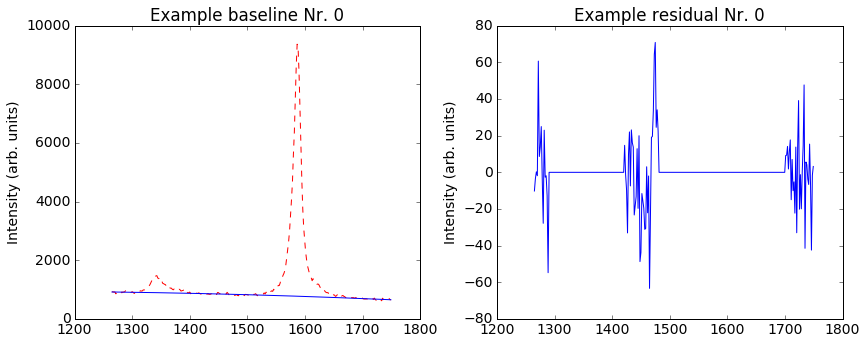

## Example for corrected spectrum

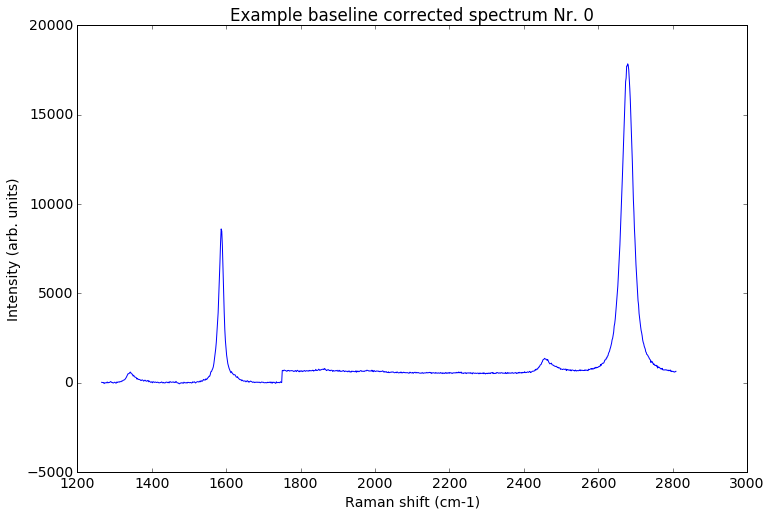

## Example baseline

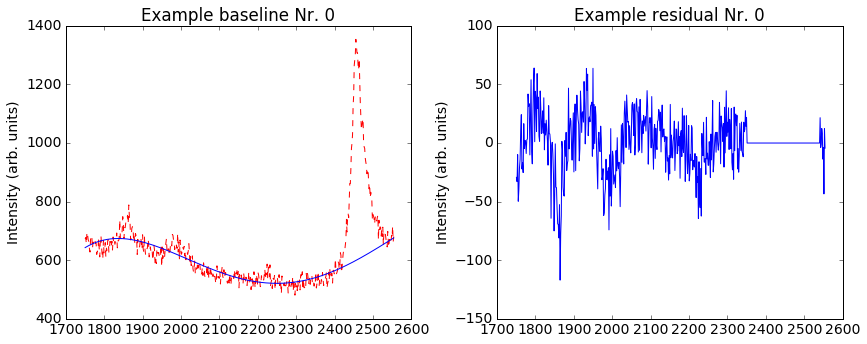

## Example for corrected spectrum

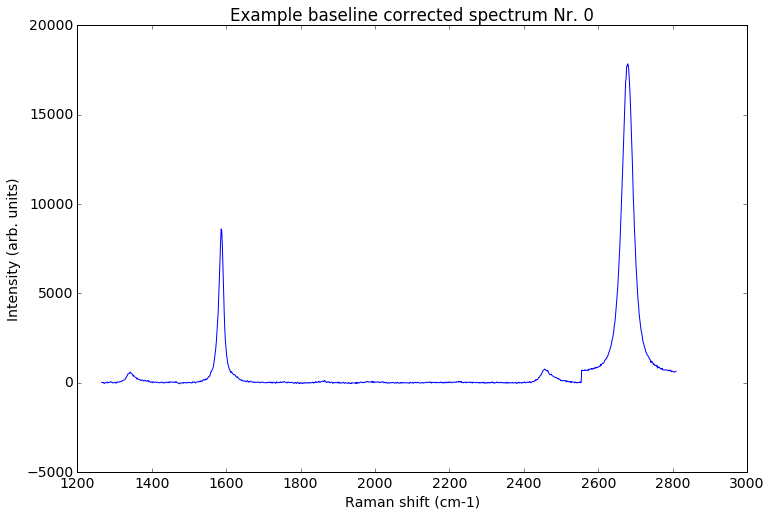

## Example baseline

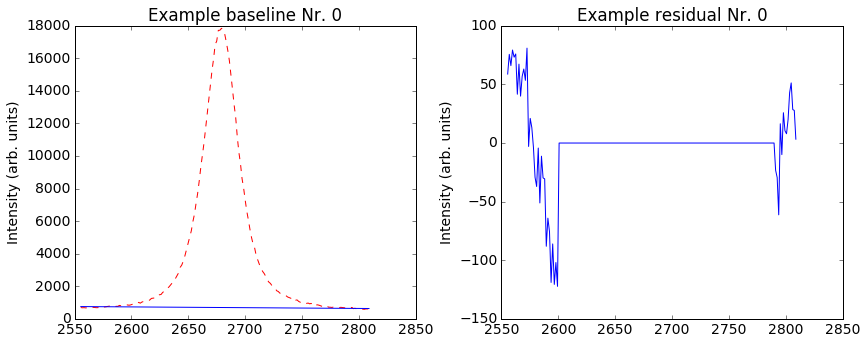

## Example for corrected spectrum

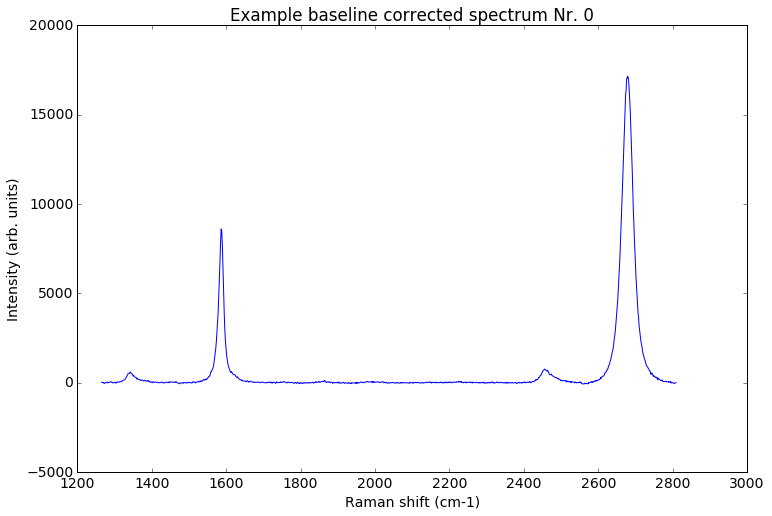

0 spectra were excluded from 121 datasets
121 datasets left for fitting


In [154]:
#next, we subtract a polynomial baseline of order given in TASK['baselineorder]
#and we sort out spectra with a too low signal to noise level
DATASET.subtractMultiBaseline(baselineParts=BASELINE, exampleSpec=0)
DATASET.filterDatasetBySNR()

## Multi-peak model

Reads the peaks defined in TASK['peaks'] and builds and lmfit CompositeModel from them.

With the runFit method, a fitting of all datasets can be started.


In [155]:
#finally we build and fit the model
GRAPHENEMODEL = MultiPseudoVoigtModel(DATASET, weights=DATASET.weights['peaks'])

## 2D peak fitting

Here starts the actual data processing.

In [156]:
GRAPHENEMODEL.runFit() 

--- Fitting datasets started  Fri, 02 Dec 2016 18:49:22 +0000
--- Fit completed in 29.9520001411438 seconds ---


## Graphene fit results

This class takes the standard fit results from lmfit and provides graphene specific evaluations.

In [157]:
#build the graphene specific evaluations from the array of fit results
RESULTS = GrapheneModelResults(GRAPHENEMODEL, DATASET)

## Results

## Fit results per peak

## Fit of average spectrum

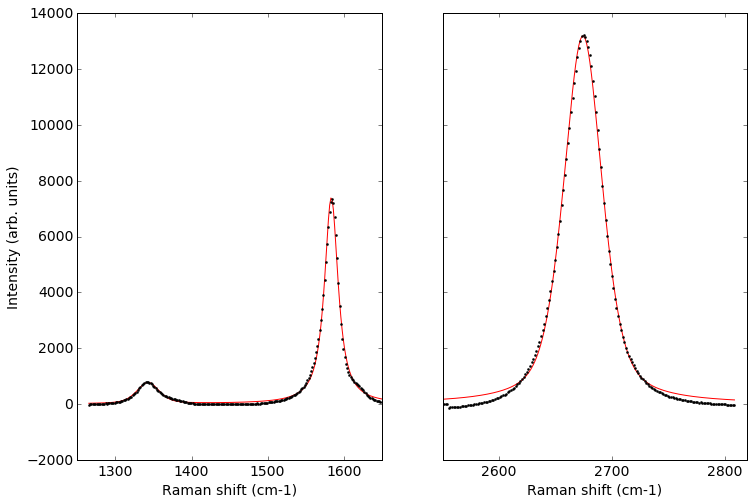

## Fitted spectra overview

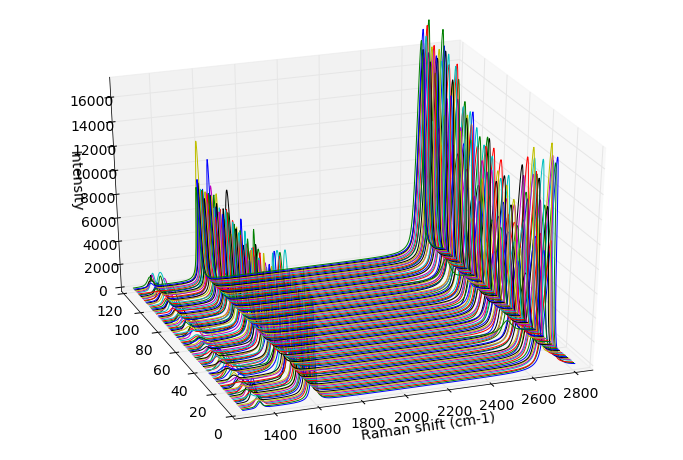

## Example fit

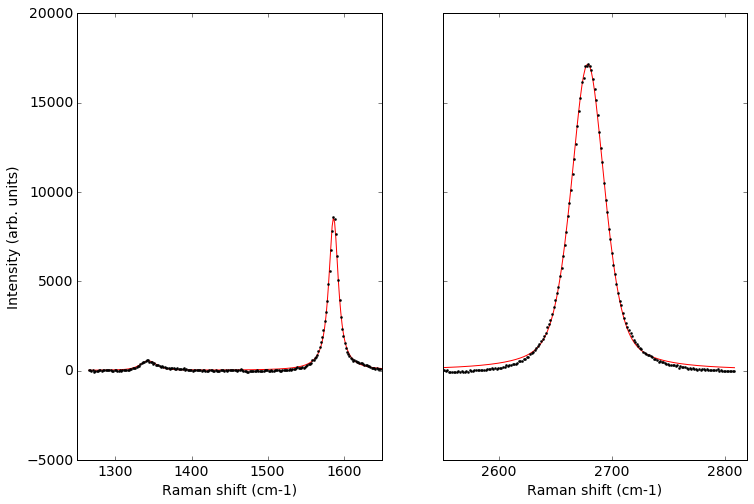

[[Model]]
    ((Model(pvoigt, prefix='D_') + Model(pvoigt, prefix='G_')) + Model(pvoigt, prefix='twoD_'))
[[Fit Statistics]]
    # function evals   = 190
    # data points      = 1014
    # variables        = 16
    chi-square         = 12370144.667
    reduced chi-square = 12394.935
    Akaike info crit   = 9572.866
    Bayesian info crit = 9651.613
[[Variables]]
    D_height:          748.524202 +/- 0        (0.00%)  == 'D_amplitude / D_fwhm'
    D_center:          1343.33013 +/- 0        (0.00%) (init= 1350)
    D_sigma:           13.0201654 +/- 0        (0.00%) (init= 30)
    D_amplitude:       19491.8178 +/- 0        (0.00%) (init= 2.390401e+07)
    D_fraction:        0.75083994 +/- 0        (0.00%) (init= 0.8)
    D_fwhm:            26.0403308 +/- 0        (0.00%)  == 'D_sigma * 2.0'
    G_height:          13116.4908 +/- 0        (0.00%)  == 'G_amplitude / G_fwhm'
    G_center:          1586.58689 +/- 0        (0.00%) (init= 1585)
    G_sigma:           7.48229950 +/- 0        (0

## 2D peak symmetry

### Normalized squared maximum residuals (NSR)

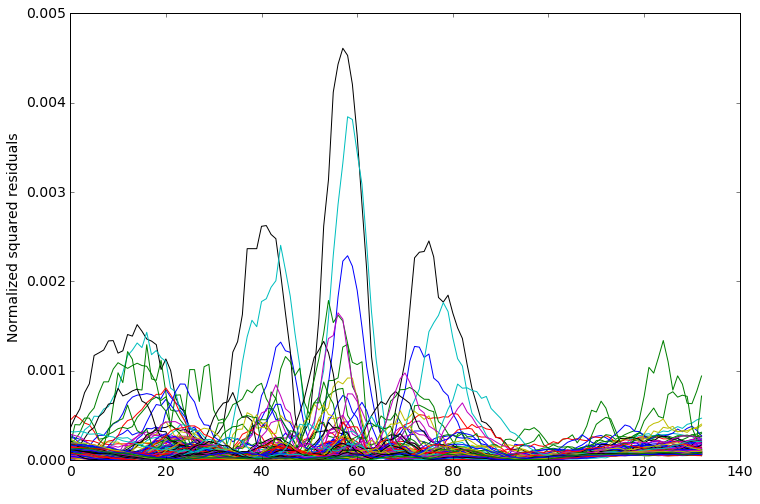

### 2D R2 intervals

Symmetric 2D shapes (R2 > 0.995): 96.69  %
Symmetric 2D shapes (R2 > 0.99): 99.17  %
Symmetric 2D shapes (R2 > 0.98): 100.00  %


### 2D peak R2: 0.999 +/- 0.002

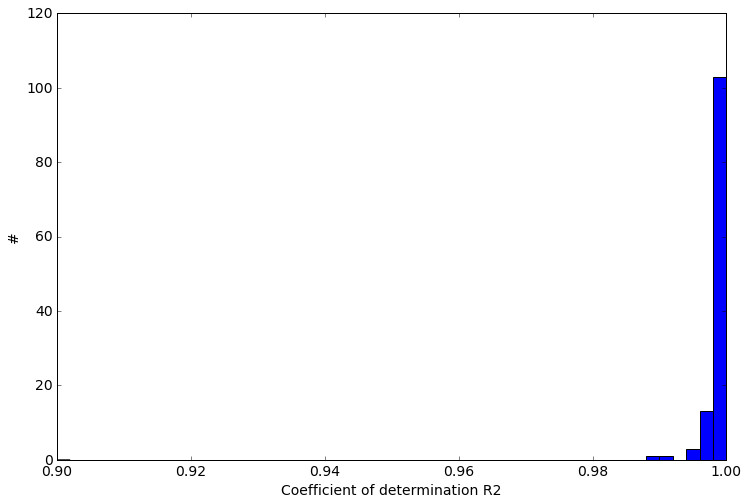

## 2D symmetry outliers

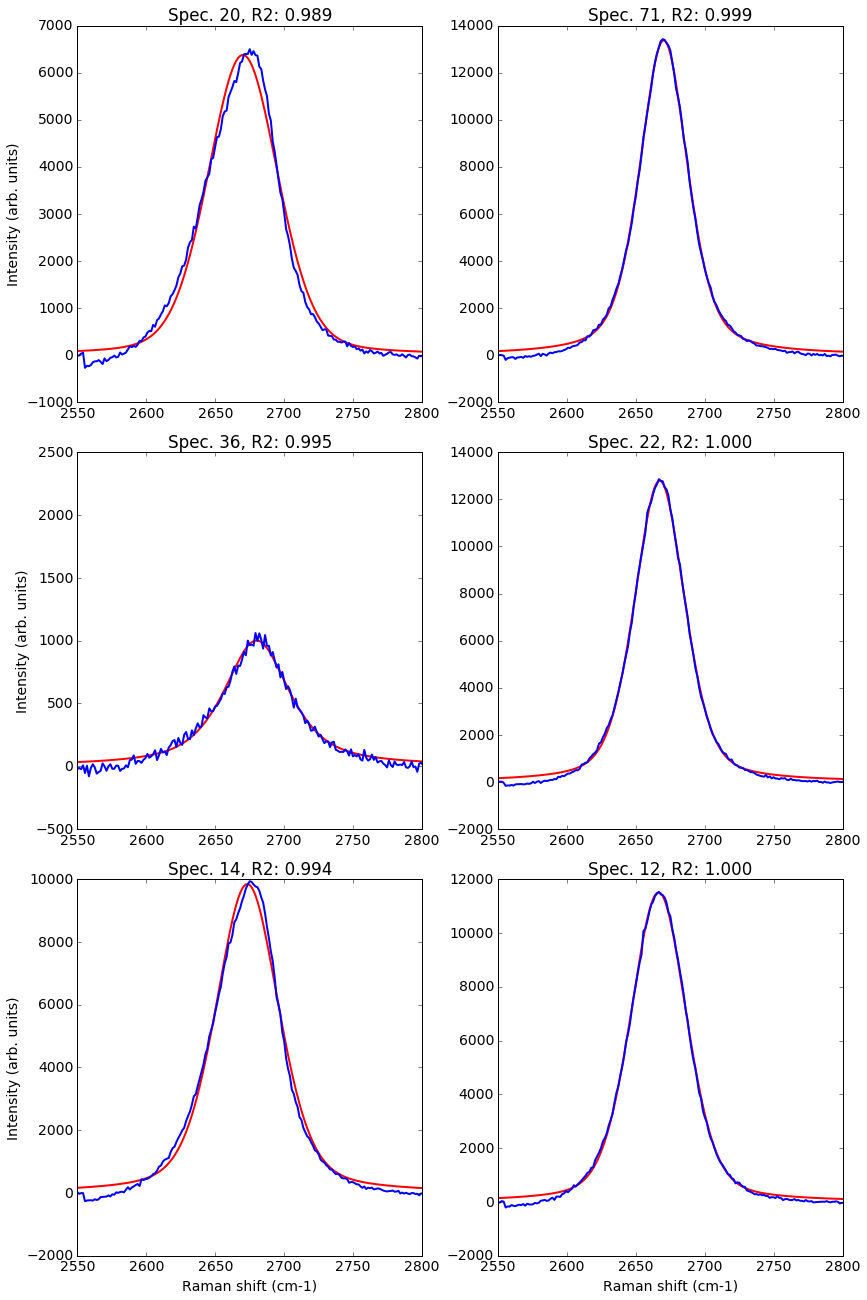

In [158]:
printmd('## Fit results per peak')
RESULTS.printResultTable()

printmd('## Fit of average spectrum')
RESULTS.plotAvgFit()

printmd('## Fitted spectra overview')
RESULTS.plot3D()

printmd('## Example fit')
exampleFitNumber = 0
RESULTS.plotFit(exampleFitNumber)
print(GRAPHENEMODEL.fitResults[exampleFitNumber].fit_report())

printmd('## 2D peak symmetry')

printmd('### Normalized squared maximum residuals (NSR)')
RESULTS.get2Dresiduals(plot=True)


printmd('### 2D R2 intervals')
RESULTS.print2Dr2Intervals(0.995)
RESULTS.print2Dr2Intervals(0.99)
RESULTS.print2Dr2Intervals(0.98)
RESULTS.print2Dr2(save=True)

printmd('## 2D symmetry outliers')
RESULTS.plot2DOutliers(3, save=True)

### Normalized squared maximum residuals (NSR)

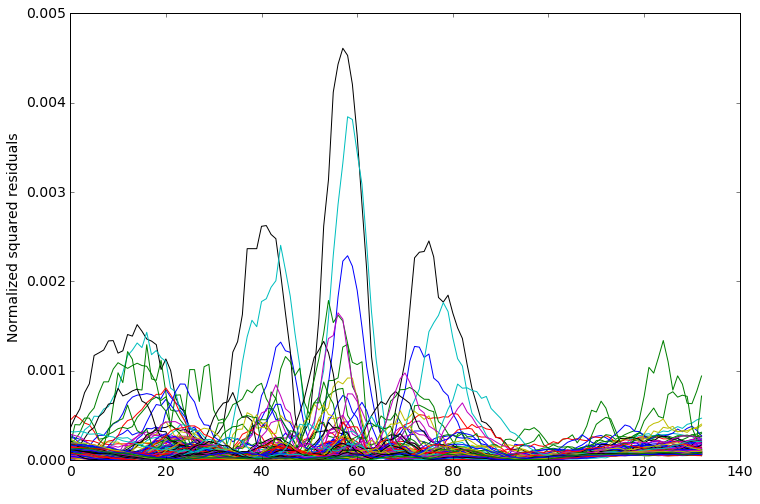

In [159]:
printmd('### Normalized squared maximum residuals (NSR)')
RESULTS.get2Dresiduals(plot=True)

### D/G intervals

D/G < 0.2): 83.90  %
D/G < 0.5): 98.31  %
D/G < 0.8): 98.31  %
D/G < 1.0): 99.15  %


## Peak ratios

D/G ratio by area:  0.139 +/- 0.133
D/G ratio by height:  0.102 +/- 0.129


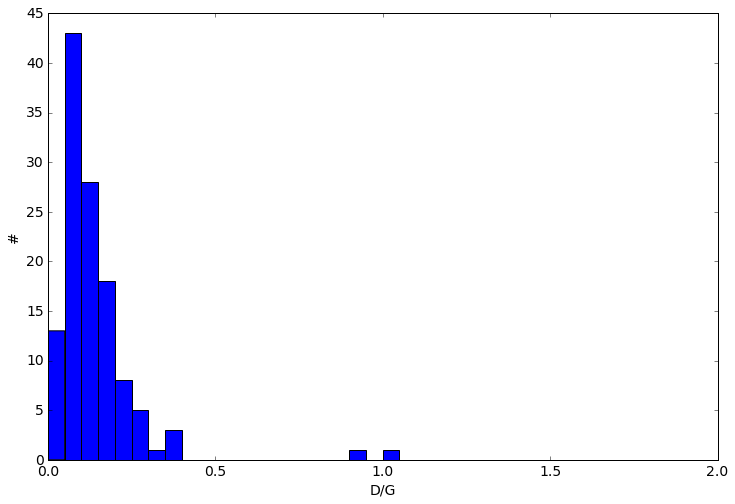

2D/G ratio by area:  3.16307010281  +/-  1.01977972798


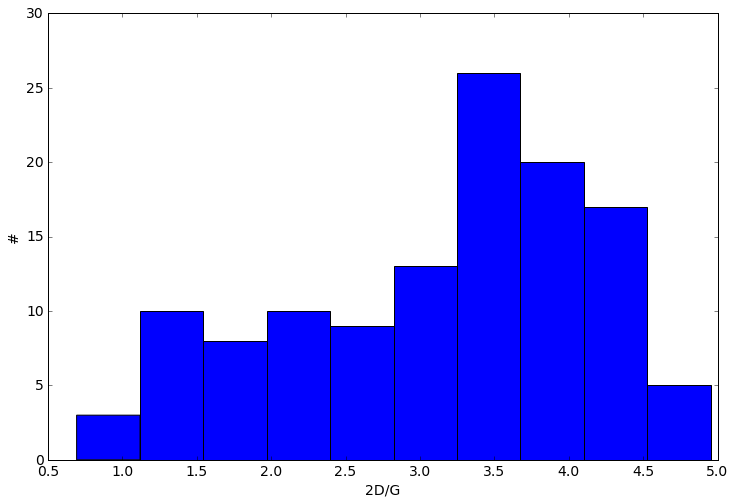

D width:  33.4400579316  +/-  10.9642850367
G width:  21.3704224557  +/-  8.31115268111
2D width:  41.4832238349  +/-  6.78497623216


## D/G outliers

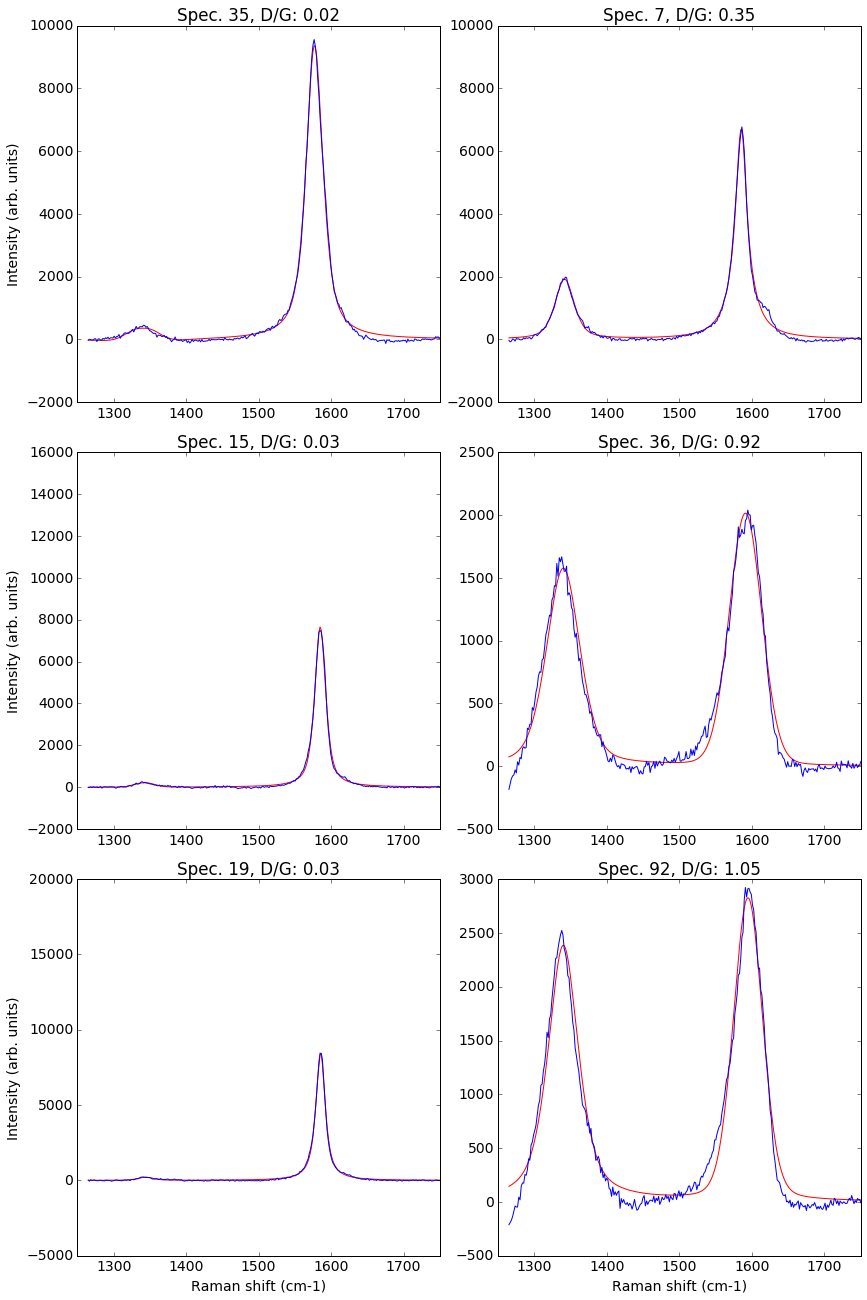

In [160]:
printmd('### D/G intervals')
RESULTS.printDtoGIntervals(0.2)
RESULTS.printDtoGIntervals(0.5)
RESULTS.printDtoGIntervals(0.8)
RESULTS.printDtoGIntervals(1.0)

printmd('## Peak ratios')
RESULTS.printPeakRatios(save=True)
RESULTS.printWidths()

printmd('## D/G outliers')
RESULTS.plotDtoGOutliers(3, save=True)

In [161]:
RESULTS.writeOutput('fitReport')
RESULTS.writeResultTable('peakResults')

Results for each sprectrum saved as:  examples/CVD_graphene_example_fitReport.csv
Peak results saved as:  examples/CVD_graphene_example_peakResults.csv


C:\Anaconda3\lib\site-packages\numpy\ma\core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [162]:
printmd('### Evaluation average values')
printmd('Format: D/G (area) +/- | 2D R2 +/- | 2D/G (area) +/- | G width +/- | 2D width +/- | G area +/- | 2D/G (height) +/-')
RESULTS.printAvgRes()

### Evaluation average values

Format: D/G (area) +/- | 2D R2 +/- | 2D/G (area) +/- | G width +/- | 2D width +/- | G area +/- | 2D/G (height) +/-

0.138851218194 0.133170802008 0.998682936936 0.00151153694152 3.16307010281 1.01977972798 21.3704224557 8.31115268111 41.4832238349 6.78497623216 241174.721029 80613.9750731 1.50008566656 0.346857789402


In [163]:
%%javascript
IPython.notebook.save_notebook();

<IPython.core.display.Javascript object>

In [164]:
from nbconvert import HTMLExporter
import codecs
import nbformat

time.sleep(1)
exporter = HTMLExporter()
output_notebook = nbformat.read('DtoG-2Dsymetry.ipynb', as_version=4)
output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(RESULTS.baseFilename + '.html', 'w', encoding='utf-8').write(output)

Good sciencing everyone!